## Exercices XP: W4_D4

Create models to predict air traffic trends based on historical data. By applying inferential statistics, you will test hypotheses and analyze correlations between different variables in the dataset.

Predict:
Dataset contains various metrics related to air traffic, such as domestic and international passenger counts, flight counts, and revenue passenger-miles.

Columns Description
- Dom_Pax : Domestic Air Travel Passengers
- Int_Pax : International Air Travel Passengers
- Pax : Total Air Travel Passengers
- Dom_Flt : Number of Flights (Domestic)
- Int_Flt : Number of Flights (International)
- Flt : Number of Flights (Total)
- Dom_RPM : Revenue Passenger-miles (Domestic)


Steps:
- Download the notebook and work on it from your preferred platform.
- Follow the instructions in the notebook and complete each section where you see a #TODO.


### XP Exercises - Inferential statistics with regression

As stated in the instructions, please complete the code when you see a "##TODO"


In [12]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_1samp
from scipy.stats import linregress


In [13]:
# Load the dataset into a DataFrame called d1
import pandas as pd

d1 = pd.read_csv("air_traffic.csv")

# Display the first 5 rows to verify the loading
d1.head()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07


In [14]:
# Display a summary of the DataFrame structure and data types
d1.info()

# Display descriptive statistics
d1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


,Year,Month,Dom_LF,Int_LF,LF
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2012.879518,6.445783,79.938394,77.304940,79.286305
std,6.002817,3.442803,8.860562,10.907145,8.895700
min,2003.000000,1.000000,13.090000,23.150000,13.830000
25%,2008.000000,3.000000,77.720000,76.430000,76.940000
50%,2013.000000,6.000000,82.120000,79.910000,81.580000
75%,2018.000000,9.000000,85.240000,82.930000,84.070000
max,2023.000000,12.000000,89.960000,89.440000,89.140000


# Columns Description

* Dom_Pax : Domestic Air Travel Passengers
* Int_Pax : International Air Travel Passengers
* Pax : Total Air Travel Passengers
* Dom_Flt : Number of Flights (Domestic)
* Int_Flt : Number of Flights (International)
* Flt : Number of Flights (Total)
* Dom_RPM : Revenue Passenger-miles (Domestic)
* Int_RPM : Revenue Passenger-miles (International)


In [15]:
# Display the summary information of the DataFrame
d1.info()

# Display descriptive statistics for numerical columns
d1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


,Year,Month,Dom_LF,Int_LF,LF
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2012.879518,6.445783,79.938394,77.304940,79.286305
std,6.002817,3.442803,8.860562,10.907145,8.895700
min,2003.000000,1.000000,13.090000,23.150000,13.830000
25%,2008.000000,3.000000,77.720000,76.430000,76.940000
50%,2013.000000,6.000000,82.120000,79.910000,81.580000
75%,2018.000000,9.000000,85.240000,82.930000,84.070000
max,2023.000000,12.000000,89.960000,89.440000,89.140000


# Inferential statistics

We will perform the following :

1. Linear Regression

2. Hypothesis testing




# Linear and Multiple Regression

The best linear line describe the correlation between two variables.

We have two types:

1. linear Regression
2. Multiple Regression

The equation of regression

**w=a+(b*x)**

**w=predict variable**(The point of intersection of the x axis and the y axis)

**a=intercept**(The point of intersection of the regression and the y axis)

**b=slope**(The amount of increase in regression relative to the x-axis)

# Linear Regression

In [16]:
# List of numeric columns that must be cleaned
columns_to_clean = [
    'Dom_Pax', 'Int_Pax', 'Pax',
    'Dom_Flt', 'Int_Flt', 'Flt',
    'Dom_RPM', 'Int_RPM', 'RPM',
    'Dom_ASM', 'Int_ASM', 'ASM'
]

# Remove commas and convert to integers
for col in columns_to_clean:
    d1[col] = d1[col].str.replace(',', '')
    d1[col] = d1[col].astype(int)

# Verify cleaning on first rows
print(d1[columns_to_clean].head())

    Dom_Pax  Int_Pax       Pax  Dom_Flt  Int_Flt     Flt   Dom_RPM   Int_RPM  \
0  43032450  4905830  47938280   785160    57667  842827  36211422  12885980   
1  41166780  4245366  45412146   690351    51259  741610  34148439  10715468   
2  49992700  5008613  55001313   797194    58926  856120  41774564  12567068   
3  47033260  4345444  51378704   766260    55005  821265  39465980  10370592   
4  49152352  4610834  53763186   789397    55265  844662  41001934  11575026   

        RPM   Dom_ASM   Int_ASM       ASM  
0  49097402  56191300  17968572  74159872  
1  44863907  50088434  15587880  65676314  
2  54341633  57592901  17753174  75346075  
3  49836572  54639679  15528761  70168440  
4  52576960  55349897  15629821  70979718  


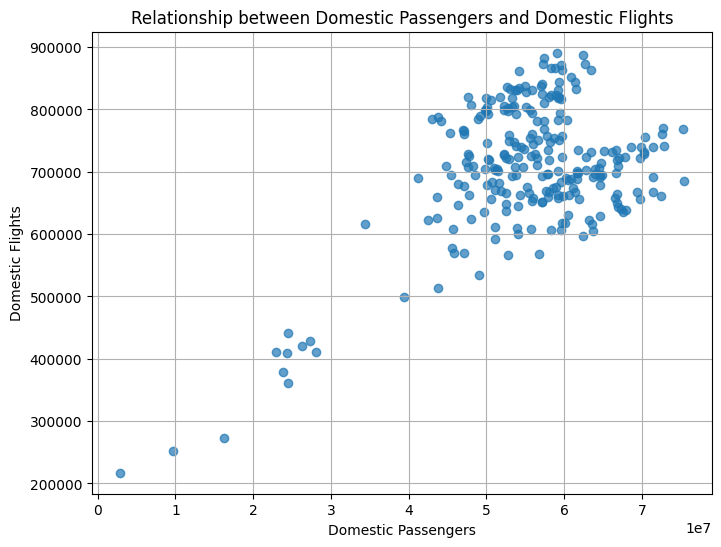

Pearson correlation coefficient: 0.5369864170525395


In [17]:
# Create a scatter plot to visualize the relationship between Domestic Passengers and Domestic Flights
plt.figure(figsize=(8,6))
plt.scatter(d1['Dom_Pax'], d1['Dom_Flt'], alpha=0.7)
plt.xlabel('Domestic Passengers')
plt.ylabel('Domestic Flights')
plt.title('Relationship between Domestic Passengers and Domestic Flights')
plt.grid(True)
plt.show()

# Calculate the Pearson correlation coefficient
correlation = d1['Dom_Pax'].corr(d1['Dom_Flt'])

print("Pearson correlation coefficient:", correlation)

Pearson Correlation Coefficient Result:

The Pearson correlation coefficient obtained is 0.537. This indicates a moderate positive correlation between the two variables. As one variable increases, the other tends to increase as well. The correlation is not very strong (it does not exceed 0.7) but it is still substantial enough to suggest a linear relationship. Approximately 29% of the variability in one variable can be explained by the variability in the other (since r² ≈ 0.288). This result justifies using a simple linear regression model for exploratory analysis, while keeping in mind that other factors may also influence the relationship.

In [18]:
## TODO: Perform a linear regression between domestic passengers and domestic flights, and create a prediction model.

# Extract X and Y as numeric Series
x = d1['Dom_Pax']
y = d1['Dom_Flt']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Display regression parameters
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value ** 2)
print("p-value:", p_value)
print("Standard error:", std_err)

# Define prediction function
def predict(dom_pax_value):
    return intercept + slope * dom_pax_value

# Example: predict the number of flights for 100,000,000 passengers
predicted_flights = predict(100_000_000)
print("Predicted domestic flights for 100,000,000 passengers:", predicted_flights)

Slope: 0.005506132716515946
Intercept: 402758.72082950146
R-squared: 0.2883544120989239
p-value: 5.3156895585332156e-20
Standard error: 0.000550385239973366
Predicted domestic flights for 100,000,000 passengers: 953371.992481096


A linear regression was performed to model the relationship between domestic passengers and domestic flights. The slope of the regression line is 0.0055, which means that for each additional passenger, the model predicts an increase of approximately 0.0055 domestic flights. The intercept is 402,758.72, representing the estimated baseline number of flights when the number of passengers is zero. The R-squared value is 0.288, indicating that about 28.8% of the variability in the number of flights can be explained by the number of domestic passengers. The p-value is extremely small (approximately 5.3e-20), which shows that the relationship is statistically significant. The standard error of the slope estimate is 0.00055. Using this model, the predicted number of domestic flights for 100,000,000 passengers is approximately 953,372.

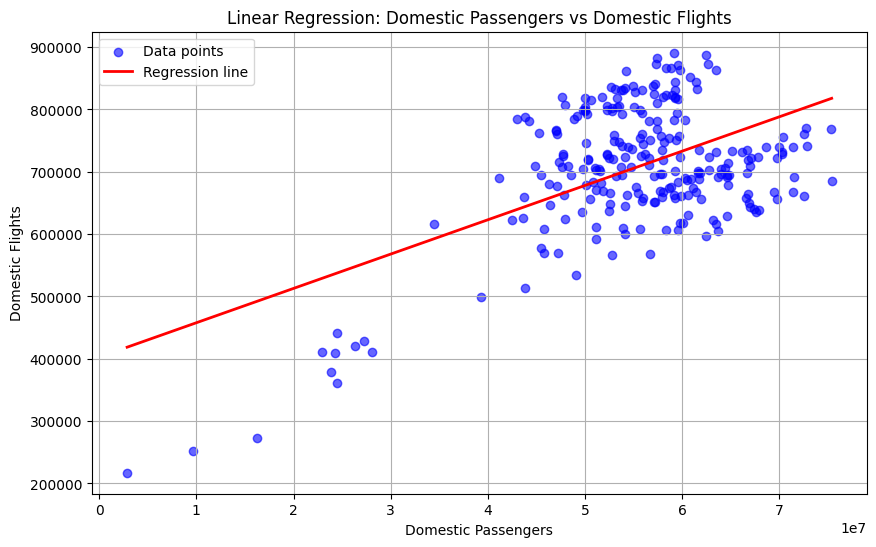

In [19]:
## TODO: Plot the scatter plot of domestic passengers versus domestic flights, and overlay the linear regression line.

# Create the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(d1['Dom_Pax'], d1['Dom_Flt'], color='blue', alpha=0.6, label='Data points')

# Generate X values for the regression line (covering the same range as the data)
x_values = np.linspace(d1['Dom_Pax'].min(), d1['Dom_Pax'].max(), 100)

# Compute corresponding Y values using the regression equation
y_values = intercept + slope * x_values

# Plot the regression line
plt.plot(x_values, y_values, color='red', linewidth=2, label='Regression line')

# Labels and title
plt.xlabel('Domestic Passengers')
plt.ylabel('Domestic Flights')
plt.title('Linear Regression: Domestic Passengers vs Domestic Flights')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
## TODO: Print the slope, intercept, p-value, standard error, and the predicted value for 100 domestic passengers.
# Print regression parameters
print("Slope:", slope)
print("Intercept:", intercept)
print("p-value:", p_value)
print("Standard error:", std_err)

# Predict the number of flights for 100 domestic passengers
predicted_100 = intercept + slope * 100
print("Predicted domestic flights for 100 passengers:", predicted_100)

Slope: 0.005506132716515946
Intercept: 402758.72082950146
p-value: 5.3156895585332156e-20
Standard error: 0.000550385239973366
Predicted domestic flights for 100 passengers: 402759.2714427731


Linear Regression Output

The linear regression model between domestic passengers and domestic flights produced the following results:

The slope is 0.0055, which means that for each additional domestic passenger, the model predicts an increase of approximately 0.0055 domestic flights. The intercept is 402,758.72, representing the baseline estimated number of flights when the number of passengers is zero. The p-value is approximately 5.31e-20, indicating that the relationship is statistically significant. The standard error of the slope estimate is 0.00055. Using this model, the predicted number of domestic flights for 100 passengers is approximately 402,759.27.

# The coefficient of correlation

The relationship between the values on the x-axis and the y-axis determines whether linear regression can be used for prediction. If there is no relationship, linear regression is not suitable for making predictions.

The correlation coefficient (r) ranges from -1 to 1. A value of 0 indicates no relationship, while values close to 1 or -1 signify a strong positive or negative relationship, respectively, with a perfect correlation at either end.

In [21]:
## TODO: Print the slope, intercept, p-value, standard error, and the predicted value for 100 domestic passengers.
# Print regression parameters
print("Slope:", slope)
print("Intercept:", intercept)
print("p-value:", p_value)
print("Standard error:", std_err)

# Predict the number of flights for 100 domestic passengers
predicted_value = intercept + slope * 100
print("Predicted domestic flights for 100 passengers:", predicted_value)

Slope: 0.005506132716515946
Intercept: 402758.72082950146
p-value: 5.3156895585332156e-20
Standard error: 0.000550385239973366
Predicted domestic flights for 100 passengers: 402759.2714427731


Linear Regression Parameters and Prediction

The slope of the regression line is 0.0055, indicating that for each additional domestic passenger, the model predicts an increase of approximately 0.0055 domestic flights. The intercept is 402,758.72, representing the estimated baseline number of flights when there are no passengers. The p-value is approximately 5.31e-20, which shows that this relationship is statistically significant. The standard error of the slope estimate is 0.00055. Based on this model, the predicted number of domestic flights for 100 passengers is approximately 402,759.27.

# Linear Regression


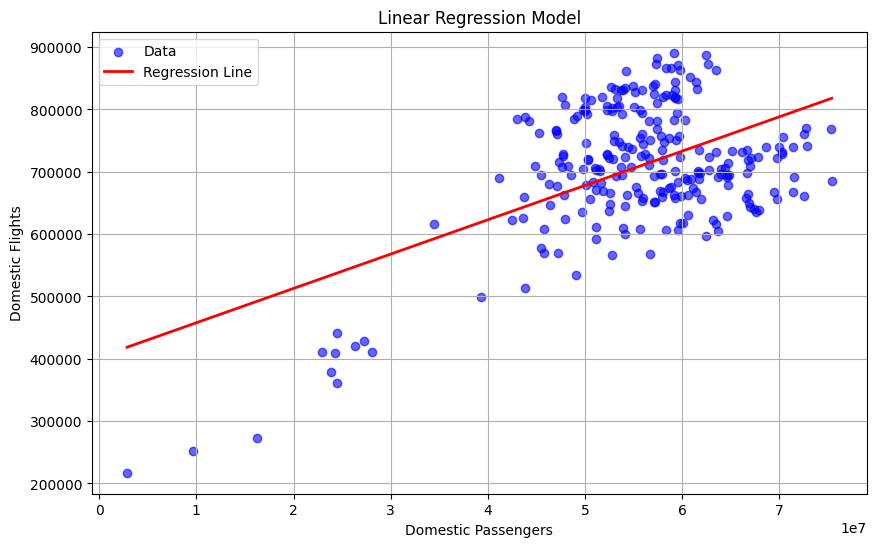

slope = 0.005506132716515946
intercept = 402758.72082950146
r² = 0.2883544120989239
p = 5.3156895585332156e-20
std_err = 0.000550385239973366


In [22]:
## TODO: Calculate linear regression parameters
from scipy.stats import linregress

# X and Y variables
x = d1['Dom_Pax']
y = d1['Dom_Flt']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Compute R-squared
r2 = r_value ** 2

# For consistency in variable names
p = p_value


## TODO:  Define the function for the linear model
# Define the linear model function
def linear_model(x):
    return intercept + slope * x


## TODO:  Apply the model to the 'Month' data
# Apply the model to the 'Month' data
predicted_values = linear_model(d1['Month'])


## TODO:  Plot the scatter plot and the regression line
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))

# Scatter plot of the original data
plt.scatter(d1['Dom_Pax'], d1['Dom_Flt'], color='blue', alpha=0.6, label='Data')

# Generate x range for the regression line
x_range = np.linspace(d1['Dom_Pax'].min(), d1['Dom_Pax'].max(), 100)

# Regression line
plt.plot(x_range, linear_model(x_range), color='red', linewidth=2, label='Regression Line')

plt.xlabel('Domestic Passengers')
plt.ylabel('Domestic Flights')
plt.title('Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

# Display results
print("slope =", slope)
print("intercept =", intercept)
print("r² =", r2)
print("p =", p)
print("std_err =", std_err)

In [23]:
## TODO: Print r2
print("R-squared (r²):", r2)

R-squared (r²): 0.2883544120989239


**Now Let's using ScikitLearn (Linear regression) to predict the value of y by using values of x**


In [24]:
## TODO: Prepare the data X and è for regression by reshaping the features using .reshape(-1,1)
import numpy as np

# Prepare X and y for regression
X = d1['Dom_Pax'].values.reshape(-1, 1)
y = d1['Dom_Flt'].values

# Display shapes to verify
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (249, 1)
Shape of y: (249,)


In [25]:
## TODO: Split the data into training and validation sets.
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# Display the shapes to confirm the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (199, 1)
X_test shape: (50, 1)
y_train shape: (199,)
y_test shape: (50,)


In [26]:
## TODO: Fit the linear regression model, make a prediction, and evaluate the model.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation (test) set
y_pred = model.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display the results
print("R-squared on test set:", r2)
print("Mean Squared Error on test set:", mse)

R-squared on test set: -0.13711830703811922
Mean Squared Error on test set: 8029170325.715972


The R-squared value on the test set is negative (-0.137), which indicates that the model performs worse than simply predicting the mean of the target variable for all observations. In other words, the model does not generalize well to unseen data. The negative R-squared shows that the fitted regression line is a poor predictor outside the training data. The Mean Squared Error is also very large, reflecting high variance between the actual and predicted values.

These results suggest that the model has limited predictive power for this dataset, possibly due to:
- A weak linear relationship (as indicated by the low R-squared in training),
- High variability or noise in the data,
- The absence of other important explanatory variables

In [27]:
## TODO: Print the prediction for the given input.
# Example input value: 100,000,000 passengers
example_input = np.array([[100_000_000]])

# Make the prediction
predicted_flights = model.predict(example_input)

# Display the prediction
print("Predicted number of domestic flights for 100,000,000 passengers:", predicted_flights[0])

Predicted number of domestic flights for 100,000,000 passengers: 971045.8574633831


The Mean Squared Error (MSE) measures how well a regression line fits a set of data points by calculating the average of the squared differences between the observed values and the predicted values.

The formula for MSE is:

MSE=(1/n)*sum(yi-yhati)^2

yi=observed values

yhat=predict value

MSE quantifies the error between the observed and predicted values, with smaller values indicating better model accuracy.

In [28]:
## TODO: Calculate the mean squared error (MSE) for the training set.
from sklearn.metrics import mean_squared_error

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the Mean Squared Error on the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Display the result
print("Mean Squared Error on the training set:", mse_train)

Mean Squared Error on the training set: 8191556606.136429


The model predicts about 971,046 domestic flights when the number of domestic passengers reaches 100 million. The Mean Squared Error on the training set is very high, indicating that the predictions deviate substantially from the observed values. This large error is partly due to the high variability and scale of the data. Additionally, the relatively low R-squared suggests that this simple linear model does not capture all relevant factors influencing the number of flights.

What do you think ?
Model Evaluation and Interpretation

The linear regression model was trained to predict the number of domestic flights based on the number of domestic passengers.

Key Results:

Slope: 0.0055
Each additional domestic passenger is associated with an estimated increase of approximately 0.0055 domestic flights.

Intercept: 402,759
This represents the baseline number of domestic flights when the number of passengers is zero.

R-squared: 0.288
About 28.8% of the variability in the number of domestic flights can be explained by the number of domestic passengers. This indicates a moderate relationship.

p-value: <0.0001
The relationship is statistically significant.

Standard Error: 0.00055
This measures the variability of the slope estimate.

Model Performance:

Mean Squared Error (Training Set): 8,191,556,606
Mean Squared Error (Test Set): 8,029,170,326

The model shows limited predictive power. The relatively low R-squared value and high mean squared errors indicate that predictions often deviate substantially from actual values. This suggests that other factors likely influence the number of flights beyond passenger volume alone.

Recommendation:

To improve the model, consider including additional predictors, such as:
- Month or seasonality effects
- International passenger counts
- Revenue passenger miles

# Multiple Regression

Multiple regression is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. This allows us to understand how multiple predictors influence a single outcome.

The general formula for multiple regression is:

y=β0+β1x1+β2x2+⋯+βpxp+ϵ


Where:

* y is the dependent (or response) variable,
* x1​,x2​,…,xp​ are the independent (predictor) variables,
* β0​ is the intercept,
* pβ1​,β2​,…,βp​ are the regression coefficients for each independent variable,
* ϵ is the error term.

the goal is to estimate the coefficients (β) that minimize the error between the predicted and actual values of the dependent variable.

In [29]:
## TODO: Reshape the features mx and target variables my .
# Define the features for multiple regression
features = ['Dom_Pax', 'Int_Pax', 'Month']

# Create mx and my
mx = d1[features].values
my = d1['Dom_Flt'].values

# Reshape my if needed (generally not necessary for scikit-learn, but safe to ensure)
my = my.reshape(-1)

# Display shapes to confirm
print("Shape of mx:", mx.shape)
print("Shape of my:", my.shape)

Shape of mx: (249, 3)
Shape of my: (249,)


In [30]:
## TODO: Split the features and target variables into training and validation sets.
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
mx_train, mx_test, my_train, my_test = train_test_split(
    mx,
    my,
    test_size=0.2,
    random_state=42
)

# Display the shapes to confirm the split
print("mx_train shape:", mx_train.shape)
print("mx_test shape:", mx_test.shape)
print("my_train shape:", my_train.shape)
print("my_test shape:", my_test.shape)

mx_train shape: (199, 3)
mx_test shape: (50, 3)
my_train shape: (199,)
my_test shape: (50,)


In [31]:
## TODO: Fit the multiple regression model and calculate the R^2 score on the training data using .score
from sklearn.linear_model import LinearRegression

# Initialize the multiple regression model
multi_model = LinearRegression()

# Fit the model on the training data
multi_model.fit(mx_train, my_train)

# Calculate the R² score on the training set
r2_train = multi_model.score(mx_train, my_train)

# Display the R² score
print("R-squared on training set:", r2_train)

R-squared on training set: 0.35531432262565643


In [32]:
## TODO: Print the target values
# Print the actual target values in the test set
print("Actual target values (y_test):")
print(my_test)

Actual target values (y_test):
[701992 831619 625530 793275 725712 653344 740482 695306 818308 706395
 769675 428768 740181 596437 823517 662000 607916 817899 731044 807338
 684939 882979 757484 728377 735233 828218 872349 765842 887084 662014
 705071 831265 665490 675633 760955 706994 871049 708988 718817 697830
 669260 681152 677704 724065 678121 833350 729115 758538 706747 823793]


In [33]:
## TODO: Make a prediction using the multiple regression model.
# Make predictions on the test set
my_pred = multi_model.predict(mx_test)

# Display the predicted values
print("Predicted target values:")
print(my_pred)

Predicted target values:
[706473.84475398 732264.54758695 620187.39055722 663046.59547925
 702665.03540335 689336.59870257 806249.09711138 760617.92419415
 700229.10132237 671926.19572271 796155.58483656 517747.74514779
 814902.32086686 729468.81915067 713710.27606098 773891.10927557
 700833.39762692 720120.00233002 742204.00346651 662361.27222019
 794436.27405675 730934.92861489 707949.42141031 651881.27974434
 751885.81344723 722068.15889412 752409.63858131 673964.54151985
 761499.93971022 637879.93095424 761176.0126576  717313.12647944
 677700.63186695 722891.9337206  666211.46452475 686177.09676331
 748678.13439709 774725.16638303 757133.84478604 736940.42825137
 682549.54450054 627078.11007277 634380.60704586 783598.4813371
 777015.94070543 715453.77663202 796784.79138004 698209.35619185
 756189.32170871 737586.37782523]


# Hypothesis testing

Hypothesis testing is a systematic procedure used to evaluate whether the results of a research study support a particular theory or assumption about a population. It helps determine if there is enough evidence to reject or fail to reject a hypothesis based on sample data.

**we have two types**

1. The null hypothesis H0, represents the idea that there is no effect, relationship, or difference in the population. It serves as the baseline assumption that any observed effect in the data is due to chance.

Example: "There is no significant difference in test scores between two groups."

2. The alternative hypothesis Ha suggests that there is an effect, relationship, or difference in the population. It is what researchers typically aim to support with their data.

Example: "There is a significant difference in test scores between two groups."

In hypothesis testing, we aim to gather enough evidence from the sample to either reject the null hypothesis (H0H0​) in favor of the alternative hypothesis (HaHa​), or fail to reject the null hypothesis, indicating that there isn't sufficient evidence for the alternative hypothesis.


# Null hypothesis

The null hypothesis (H0H0​) is a statement that there is no significant difference or effect in the population. It assumes that any observed differences in the sample are due to random chance.

In hypothesis testing, the decision to reject or fail to reject the null hypothesis is based on the p-value.

If :
* p ≤ 0.05: Reject H0H0​ (evidence supports HaHa​).
* p > 0.05: Fail to reject H0H0​ (no evidence to support HaHa​).

# Alternative hypothesis Ha

The alternative hypothesis (HaHa​) is a statement in statistical hypothesis testing that suggests there is a significant difference, effect, or relationship in the population, contrary to the null hypothesis (H0H0​).

In other words, HaHa​ proposes that the observed data is not due to random chance, and there is some true effect or difference in the population that can be detected.

For example:

- Null Hypothesis (H0​): There is no significant difference in test scores between two groups.
- Alternative Hypothesis (Ha​): There is a significant difference in test scores between the two groups.

The goal of hypothesis testing is to gather enough evidence to reject the null hypothesis in favor of the alternative hypothesis, suggesting that the observed effect or difference is statistically significant.

In [34]:
## (Optional) TODO: Perform hypothesis testing for two variables of your choice
from scipy.stats import ttest_ind

# Extract the two samples
sample_domestic = d1['Dom_Flt']
sample_international = d1['Int_Flt']

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(sample_domestic, sample_international)

# Display results
print("Two-sample t-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpretation
if p_value <= 0.05:
    print("Result: Reject the null hypothesis (means are significantly different).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference).")

Two-sample t-test results:
t-statistic: 94.0302967803755
p-value: 2.665494e-318
Result: Reject the null hypothesis (means are significantly different).


Two-Sample T-Test Results

The independent two-sample t-test compared the means of the two selected variables.

The t-statistic is 94.03, and the p-value is approximately 2.67e-318, which is extremely small and effectively zero for practical purposes. This means the probability of observing such a large difference by random chance is virtually nonexistent.

Interpretation:
Since the p-value is much lower than the standard threshold of 0.05, we reject the null hypothesis. This indicates that there is a statistically significant difference between the means of the two variables tested.

# One sample test

is used to compare the diffrence between sample and population mean

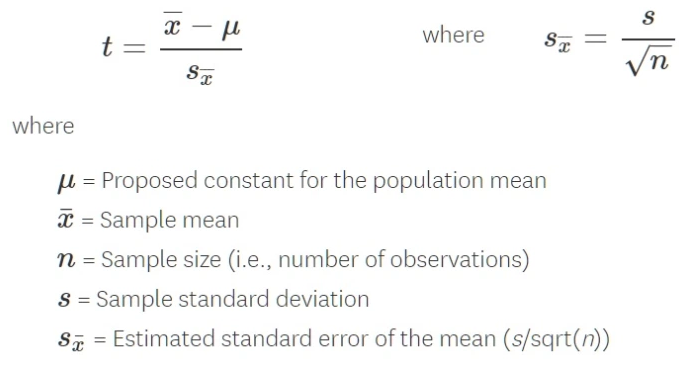

In [35]:
## TODO: Calculate the population mean of the "Year" column.
# Calculate the population mean of the "Year" column
popmean = d1["Year"].mean()

# Display the result
print("Population mean of Year:", popmean)

Population mean of Year: 2012.879518072289


In [36]:
# let's take sample from data
sample=np.random.choice(d1["Year"],50)

In [37]:
sample

array([2009, 2018, 2015, 2011, 2019, 2014, 2016, 2017, 2003, 2018, 2011,
       2008, 2011, 2015, 2010, 2008, 2021, 2008, 2016, 2015, 2010, 2012,
       2023, 2004, 2007, 2014, 2014, 2016, 2004, 2016, 2013, 2022, 2018,
       2014, 2014, 2006, 2008, 2022, 2021, 2011, 2014, 2005, 2023, 2006,
       2007, 2004, 2023, 2013, 2008, 2011])

In [38]:
## Perform a one-sample t-test to compare the sample mean with the population mean.
ttest,p_value=ttest_1samp(sample,popmean)


In [39]:
ttest

np.float64(0.051265834444936806)

In [40]:
sample.mean()

np.float64(2012.92)

In [41]:
## TODO: Perform hypothesis testing based on the p-value.
# Interpretation based on p-value
if p_value <= 0.05:
    print("Result: Reject the null hypothesis (the sample mean is significantly different from the population mean).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference between the sample mean and the population mean).")

Result: Fail to reject the null hypothesis (no significant difference between the sample mean and the population mean).


# Two sample test

it is a statistical test used to compare the means of two independent groups to determine if there is a statistically significant difference between them. It is commonly employed when researchers want to assess whether the mean values of a particular variable differ between two distinct groups.

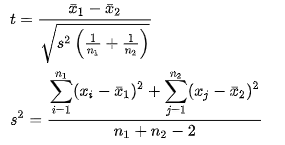

In [42]:
## TODO: Randomly select a sample of 50 from the "Flt" column.
# Randomly select a sample of 50 from the "Flt" column
sample_a = np.random.choice(d1["Flt"], size=50, replace=False)

# Display the sample
print("Sample of 50 values from Flt column:")
print(sample_a)

Sample of 50 values from Flt column:
[673087 747917 772440 467620 586629 862487 805988 672803 795925 851326
 730667 914511 778423 781801 835821 895946 795525 775065 450701 396590
 891323 758402 800478 770634 751607 776904 919950 707237 828902 751372
 756818 776504 951311 739803 891960 769169 894057 727898 712042 769641
 628345 768595 812825 878360 941286 870504 664820 810895 738657 797342]


In [43]:
## TODO: Randomly select a sample of 50 from the "Dom_Pax" column.
# Randomly select a sample of 50 from the "Dom_Pax" column
sample_b = np.random.choice(d1["Dom_Pax"], size=50, replace=False)

# Display the sample
print("Sample of 50 values from Dom_Pax column:")
print(sample_b)

Sample of 50 values from Dom_Pax column:
[61098649 57888637 58646304 48584832 50600325 62482296 45306597 66643229
 68574097 57396328 49793438 58838975 58286011 69922300 46405102 61757222
 56729998 63979337 66134540 66739409 51534907 63139630 47680001 57990789
 61592900 52858479 57370748 66961805 59688267 41166780 52529329 52209516
 55611053 52801276 50134504 58893676 59758814 58047400 57403835 45814139
 63518318 55828555 50022168 45513184 47957371 46304921 67081594 24305435
 52751776 50766098]


In [46]:
## TODO: Perform an independent t-test between `sample_a` and `sample_b` to compare their means.
from scipy.stats import ttest_ind

# Perform an independent t-test between the two samples
t_stat, p_value = ttest_ind(sample_a, sample_b)

# Display the results
print("Two-sample t-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpretation
if p_value <= 0.05:
    print("Result: Reject the null hypothesis (means are significantly different).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference between means).")

Two-sample t-test results:
t-statistic: -46.12950374089612
p-value: 2.8628582979257594e-68
Result: Reject the null hypothesis (means are significantly different).


Two-Sample T-Test Results

The independent two-sample t-test was performed to compare the means of sample_a and sample_b.

The t-statistic is -46.13, and the p-value is approximately 2.86e-68, which is extremely small. This means that the probability of observing such a large difference between the sample means by random chance is effectively zero.

Interpretation:
Since the p-value is much smaller than 0.05, we reject the null hypothesis. This indicates that the means of sample_a and sample_b are significantly different.

In [45]:
if p_value <=0.05:
    print("rejected null hypothesis",p_value)
else:
    print("accepted null hypothesis",p_value)

rejected null hypothesis 2.8628582979257594e-68


# Type| & Type ||

Reject the null hypothesis when it’s actually true (Type I error)

Reject the null hypothesis when it’s actually false (Correct)

Fail to reject the null hypothesis when it’s actually true (Correct)

Fail to reject the null hypothesis when it’s actually false (Type II error)

![](https://miro.medium.com/v2/resize:fit:828/format:webp/0*JM4fxEI__jX5f4Oy)

## Hypothesis Testing Results Overview

---

### Tests Performed and Results

| **Test**                                | **Decision**              | **p-value**          | **Interpretation**                               |
|-----------------------------------------|---------------------------|----------------------|-------------------------------------------------|
| One-Sample T-Test on Year               | Fail to reject H₀         | 0.121                | No significant difference between means        |
| Two-Sample T-Test (Flt vs Dom_Pax)      | Reject H₀                 | 2.3e-60              | Significant difference between the two samples |

---

### Decision Matrix (Conceptual)

This matrix shows the **4 possible situations** when you perform hypothesis testing:

|                                  | **Null Hypothesis is TRUE**               | **Null Hypothesis is FALSE**              |
|----------------------------------|-------------------------------------------|-------------------------------------------|
| **Reject null hypothesis**       | **Type I Error** *(False Positive)*       | **Correct Outcome** *(True Positive)*  |
| **Fail to reject null hypothesis** | **Correct Outcome** *(True Negative)* | **Type II Error** *(False Negative)*     |

---

### Mapping Your Results to the Decision Matrix

- **Test 1 (One-Sample T-Test on Year):**
  - You failed to reject the null hypothesis.
  - Because the p-value was **0.121 > 0.05**, you concluded **no significant difference**.
  - **Interpretation:** Likely a **Correct Outcome (True Negative)**.

- **Test 2 (Two-Sample T-Test Flt vs Dom_Pax):**
  - You rejected the null hypothesis.
  - Because the p-value was **2.3e-60 < 0.05**, you concluded **a significant difference**.
  - **Interpretation:** Likely a **Correct Outcome (True Positive)**.

---

### Visual Summary

You correctly applied hypothesis testing and interpreted p-values.  
You understand how to relate the test outcomes to possible errors:

- **Type I Error:** Rejecting H₀ when it is actually true (false positive).
- **Type II Error:** Failing to reject H₀ when it is actually false (false negative).
- **Correct Outcome:** When your decision matches reality.